In [1]:
import function as fn
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# general settings for charts
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}
matplotlib.rc('font', **font)

main_color = '#0000b3'
main_color2 = '#b30000'
secondary_color = '#b3b3ff'

# In this file a single network is analysed. The options are:
# * mathoverflow_{a2q, c2q, c2a}
# * superuser_{a2q, c2q, c2a}
# * askubuntu_{a2q, c2q, c2a}


In [3]:
dataset_options = {
    1: 'data/mathoverflow/sx-mathoverflow-a2q.txt',
    2: 'data/mathoverflow/sx-mathoverflow-c2q.txt',
    3: 'data/mathoverflow/sx-mathoverflow-c2a.txt',
    4: 'data/mathoverflow/sx-askubuntu-a2q.txt',
    5: 'data/mathoverflow/sx-askubuntu-c2q.txt',
    6: 'data/mathoverflow/sx-askubuntu-c2a.txt',
    7: 'data/mathoverflow/sx-superuser-a2q.txt',
    8: 'data/mathoverflow/sx-superuser-c2q.txt',
    9: 'data/mathoverflow/sx-superuser-c2a.txt'
}

### GENERATE GRAPHS

In [4]:
nodes, edges_per_t = fn.read_graph_from_file(dataset_options[1])
# edges_per_t_sec = fn.aggregate_edges_by_granularity(edges_per_t, 'sec')
# edges_per_t_min = fn.aggregate_edges_by_granularity(edges_per_t, 'min')
# edges_per_t_hour = fn.aggregate_edges_by_granularity(edges_per_t, 'hour')
edges_per_t_day = fn.aggregate_edges_by_granularity(edges_per_t, 'day')

In [ ]:
# G_directed = fn.generate_weighted_aggregated_graph(nodes, edges_per_t)
# nx.write_gpickle(G_raw, 'pickles/graphs/directed_graph.gpickle') # This so we dont have to compute it everytime 

In [7]:
# G_sec = fn.generate_weighted_aggregated_graph(nodes, edges_per_t_sec)
# nx.write_gpickle(G_sec, 'pickles/graphs/directed_graph_sec.gpickle') # This so we dont have to compute it everytime 

# G_min = fn.generate_weighted_aggregated_graph(nodes, edges_per_t_min)
# nx.write_gpickle(G_min, 'pickles/graphs/directed_graph_min.gpickle') # This so we dont have to compute it everytime 

# G_hour = fn.generate_weighted_aggregated_graph(nodes, edges_per_t_hour)
# nx.write_gpickle(G_hour, 'pickles/graphs/directed_graph_hour.gpickle') # This so we dont have to compute it everytime 

# G_day = fn.generate_weighted_aggregated_graph(nodes, edges_per_t_day)
# nx.write_gpickle(G_day, 'pickles/graphs/directed_graph_day.gpickle')



In [8]:
G_directed = nx.read_gpickle('pickles/graphs/directed_graph.gpickle')
# G_sec = nx.read_gpickle('pickles/graphs/directed_graph_sec.gpickle')
# G_min = nx.read_gpickle('pickles/graphs/directed_graph_min.gpickle')
# G_hour = nx.read_gpickle('pickles/graphs/directed_graph_hour.gpickle')
G_day = nx.read_gpickle('pickles/graphs/directed_graph_day.gpickle')

### BASIC INFORMATION ABOUT THE AGGREGATED GRAPH PER DAY

In [10]:
different_keys = []
total_edge_count = 0
for k, v in edges_per_t.items():
    different_keys.append(k)
    total_edge_count += len(v)
print('Temporal edges (new granularity)', total_edge_count)
print('Edges in static graph', len(G_directed.edges()))
print('Total different days', len(different_keys))

Temporal edges (new granularity) 107581
Edges in static graph 90489
Total different days 107547


### INTERACTIONS PER DAY

C:\Users\rafai\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


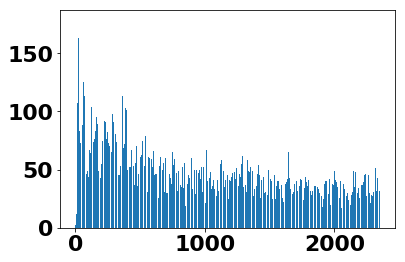

In [11]:
current_G = G_day
current_edges_per_t = edges_per_t_day
current_nodes = nodes
min_t = min([k for k in current_edges_per_t.keys()])
max_t = max([k for k in current_edges_per_t.keys()])

x = []
y = []
for k, v in current_edges_per_t.items():
    x.append(float(k))
    y.append(len(v))

plt.bar(x, y)
plt.show()

### DEGREE DISTRIBUTION

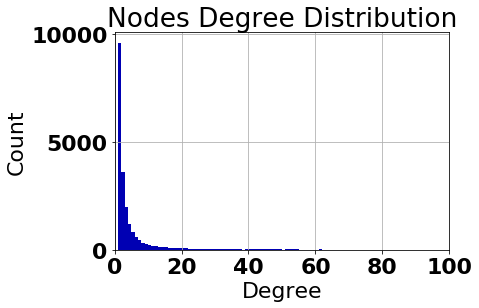

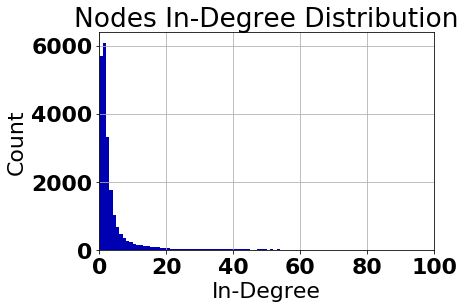

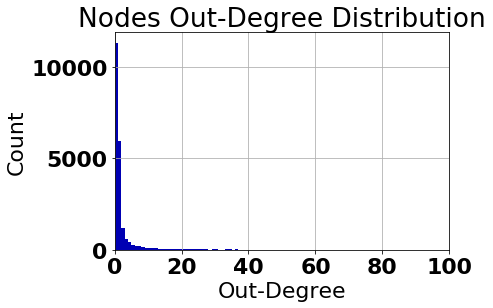

In [16]:
N = G_directed.number_of_nodes()
E = G_directed.number_of_edges()
link_density = nx.density(G_directed)
assortativity = nx.degree_assortativity_coefficient(G_directed)
clustering_coefficient = nx.average_clustering(G_directed)
G_degrees = fn.get_graph_degrees(G_directed)
G_in_degrees = fn.get_graph_in_degrees(G_directed)
G_out_degrees = fn.get_graph_out_degrees(G_directed)


def plot_degree_dist(G_degrees, degree="Degree"):
#     degree_list = G_degrees[:, 1]
#     max_degree = np.max(degree_list)
    x = np.arange(1, len(G_degrees) + 1)
    x, y = np.unique(G_degrees[:, 1], return_counts=True)
    # plt.figure(figsize=(15, 8), dpi= 180, facecolor='w', edgecolor='k')
    plt.bar(x, y, width=1, align='edge', color=main_color)
    # plt.plot(x_pow, y_pow, 'g-', linewidth=1, markersize=2)
    plt.xlabel(degree)
    plt.ylabel('Count')
    plt.title('Nodes {} Distribution'.format(degree))
    plt.xlim((0, 100))
    plt.grid(True)
    plt.show()


plot_degree_dist(G_degrees)
plot_degree_dist(G_in_degrees, "In-Degree")
plot_degree_dist(G_out_degrees, "Out-Degree")


### METRICS FOR AGGREGATED GRAPH

In [14]:
def get_G_local_clustering(G):
    G_local_clustering = []
    for k, v in nx.clustering(G).items():
        k = int(k)
        G_local_clustering.append([k, v])
    G_local_clustering.sort(key=lambda tup: tup[0])
    return G_local_clustering


G_local_clustering = get_G_local_clustering(G_directed)
print(G_local_clustering)

[[1, 0.04449709191349846], [2, 0.0969053759174767], [3, 0.09127210496292071], [4, 0.1095636025998143], [7, 0.06044723969252271], [11, 0.0983157894736842], [13, 0], [14, 0], [16, 0.04064039408866995], [18, 0.25], [19, 0.09523809523809523], [21, 0.16666666666666666], [22, 0.06777484483127631], [25, 0.09996191926884997], [27, 0.05831995719636169], [28, 0.2222222222222222], [30, 0.023809523809523808], [32, 0.08081113801452784], [37, 0.8333333333333334], [40, 0.07341269841269842], [42, 0.32142857142857145], [44, 0.16071428571428573], [45, 0.06253715241848484], [49, 0.06048568671598585], [50, 0], [51, 0.051423814199718226], [54, 0], [55, 0], [56, 0.3333333333333333], [60, 0], [65, 0.05604852915272151], [66, 0.03625674505362734], [70, 0], [71, 0.16666666666666666], [75, 0.025348742720418944], [76, 0.1], [78, 0.04424518406712886], [81, 0.24545454545454545], [83, 0.05809638433378467], [85, 0.11988304093567251], [86, 0.5], [88, 0.09803921568627451], [91, 0], [92, 0.19047619047619047], [93, 0.128

In [17]:
print('Nodes: ', N)
print('Edges: ', E)
# print('Is connected?: ', nx.is_connected(G))
print('Link density: ', link_density)
print('In-Degree: ')
print(' - Mean: ', G_in_degrees[:, 1].mean())
print(' - Variance: ', G_in_degrees[:, 1].std() ** 2)
print(' - Std: ', G_in_degrees[:, 1].std())
print('Out-Degree: ')
print(' - Mean: ', G_out_degrees[:, 1].mean())
print(' - Variance: ', G_out_degrees[:, 1].std() ** 2)
print(' - Std: ', G_out_degrees[:, 1].std())
print('Assortativity: ', assortativity)
print('Clustering coefficient: ', clustering_coefficient)


Nodes:  21688
Edges:  90489
Link density:  0.00019238747944350337
In-Degree: 
 - Mean:  4.1723072666912575
 - Variance:  175.406542223551
 - Std:  13.244113493305282
Out-Degree: 
 - Mean:  4.1723072666912575
 - Variance:  557.8694710321085
 - Std:  23.619260594525574
Assortativity:  -0.10282295133040018
Clustering coefficient:  0.054836183133841414
